# KNN

In [441]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

%matplotlib inline

data = pd.read_csv("balance-scale.data",sep = ',')
data.columns = ['Class','Left-Weight','Left-Distance','Right_Weight','Right-Distance']

In [442]:
print(data)
data["Class"].replace({"R": 3 , "L": 1 , "B":2 }, inplace=True)

    Class  Left-Weight  Left-Distance  Right_Weight  Right-Distance
0       R            1              1             1               2
1       R            1              1             1               3
2       R            1              1             1               4
3       R            1              1             1               5
4       R            1              1             2               1
..    ...          ...            ...           ...             ...
619     L            5              5             5               1
620     L            5              5             5               2
621     L            5              5             5               3
622     L            5              5             5               4
623     B            5              5             5               5

[624 rows x 5 columns]


In [443]:
print(data)
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

     Class  Left-Weight  Left-Distance  Right_Weight  Right-Distance
0        3            1              1             1               2
1        3            1              1             1               3
2        3            1              1             1               4
3        3            1              1             1               5
4        3            1              1             2               1
..     ...          ...            ...           ...             ...
619      1            5              5             5               1
620      1            5              5             5               2
621      1            5              5             5               3
622      1            5              5             5               4
623      2            5              5             5               5

[624 rows x 5 columns]


In [444]:
print(len(train))
train

502


,Class,Left-Weight,Left-Distance,Right_Weight,Right-Distance
1,3,1,1,1,3
2,3,1,1,1,4
3,3,1,1,1,5
4,3,1,1,2,1
5,3,1,1,2,2
...,...,...,...,...,...
619,1,5,5,5,1
620,1,5,5,5,2
621,1,5,5,5,3
622,1,5,5,5,4


In [445]:
len(test)
test

,Class,Left-Weight,Left-Distance,Right_Weight,Right-Distance
0,3,1,1,1,2
9,3,1,1,3,1
21,3,1,1,5,3
28,3,1,2,1,5
29,2,1,2,2,1
...,...,...,...,...,...
605,1,5,5,2,2
611,1,5,5,3,3
615,1,5,5,4,2
616,1,5,5,4,3


In [446]:
print(data.columns[1:])

Index(['Left-Weight', 'Left-Distance', 'Right_Weight', 'Right-Distance'], dtype='object')


In [492]:
#train_Y = 
alldata = data.to_numpy()
train = data[msk].to_numpy()
test = data[~msk].to_numpy()
print(len(train))
print(len(test))

502
122


In [448]:
train_Y = train[:,0]
test_Y = test[:,0]
print(train_Y.shape)
print(test_Y.shape)

(502,)
(122,)


In [449]:
train_X = train[:,1:]
test_X = test[:,1:]
print(train_X)

[[1 1 1 3]
 [1 1 1 4]
 [1 1 1 5]
 ...
 [5 5 5 3]
 [5 5 5 4]
 [5 5 5 5]]


In [450]:
print(train_X.shape)
print(test_X.shape)

(502, 4)
(122, 4)


In [451]:
#classifier  = KNearestNeighbor()
#classifier.train(train_X, train_Y)
#y_test_pred = classifier.predict(test_X,1)

In [ ]:
from scipy.stats import mode

In [452]:
#print(y_test_pred)

In [453]:
#test_Y

In [454]:
#Importing the required modules
import numpy as np

 
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 
#Function to calculate KNN
def predict(x_train, y , x_test, k ):
    class_labels = []
     
    #Loop through the Datapoints to be classified
    for i in x_test: 
         
        #Array to store distances
        pdists = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            dists = eucledian(np.array(x_train[j,:]) , i) 
            #Calculating the distance
            pdists.append(dists) 
        pdists = np.array(pdists) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(pdists)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        class_labels.append(lab)
 
    return class_labels

In [455]:
from sklearn.metrics import accuracy_score 


y_pred = predict(train_X,train_Y,test_X, 7)
 
#Checking the accuracy
print("Accuracy of my KNN by sklearn", accuracy_score(test_Y, y_pred))

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7, p=2)
clf.fit(train_X, train_Y)
y_pred_test = clf.predict(test_X)

print(f"Sklearn KNN Accuracy: {accuracy_score(test_Y, y_pred_test)}")

Accuracy of my KNN by sklearn 0.8852459016393442
Sklearn KNN Accuracy: 0.9016393442622951


In [456]:


accuracies = []

for k in range(1,20):
    y_hat_test = predict(train_X, train_Y,test_X ,k)
    print("for k = "+ str(k) + " Accuracy is ",accuracy_score(test_Y, y_hat_test))



for k = 1 Accuracy is  0.7950819672131147
for k = 2 Accuracy is  0.7950819672131147
for k = 3 Accuracy is  0.8524590163934426
for k = 4 Accuracy is  0.8770491803278688
for k = 5 Accuracy is  0.8770491803278688
for k = 6 Accuracy is  0.8934426229508197
for k = 7 Accuracy is  0.8852459016393442
for k = 8 Accuracy is  0.9098360655737705
for k = 9 Accuracy is  0.9016393442622951
for k = 10 Accuracy is  0.9016393442622951
for k = 11 Accuracy is  0.9016393442622951
for k = 12 Accuracy is  0.9016393442622951
for k = 13 Accuracy is  0.9016393442622951
for k = 14 Accuracy is  0.9016393442622951
for k = 15 Accuracy is  0.9016393442622951
for k = 16 Accuracy is  0.9098360655737705
for k = 17 Accuracy is  0.9180327868852459
for k = 18 Accuracy is  0.9098360655737705
for k = 19 Accuracy is  0.9180327868852459


In [457]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = test_Y
# predicted values
predicted = y_pred

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,2,3])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
# tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,2,3])
# print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,2,3])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[59  0  2]
 [ 3  0  4]
 [ 4  1 49]]
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.97      0.93        61
           2       0.00      0.00      0.00         7
           3       0.89      0.91      0.90        54

    accuracy                           0.89       122
   macro avg       0.59      0.62      0.61       122
weighted avg       0.84      0.89      0.86       122



In [458]:
currentDataClass = test_Y     
predictedClass = y_pred

# classes = 3 #int(max(currentDataClass) - min(currentDataClass)) + 1 #find number of classes

# counts = [[sum([(currentDataClass[i] == true_class) and (predictedClass[i] == pred_class) 
# for i in range(len(currentDataClass))])
#            for pred_class in range(1, classes + 1)] 
#            for true_class in range(1, classes + 1)]

# counts
classes = set(currentDataClass)
print(classes)
number_of_classes = len(classes)

conf_matrix = pd.DataFrame(
    np.zeros((number_of_classes, number_of_classes),dtype=int),
    index=classes,
    columns=classes)

for i, j in zip(currentDataClass,predictedClass):
        conf_matrix.loc[i, j] += 1

print(conf_matrix.values)
counts = conf_matrix.values
counts

{1, 2, 3}
[[59  0  2]
 [ 3  0  4]
 [ 4  1 49]]


array([[59,  0,  2],
       [ 3,  0,  4],
       [ 4,  1, 49]])

In [459]:
print("\tClass1\tClass2\tClass3")
print("FN Values: ",end=" ")
fn1 = counts[1][0] + counts[2][0] 
fn2 = counts[0][0] + counts[2][0]
fn3 = counts[1][0] + counts[0][0]
print(fn1,'\t',fn2,'\t',fn3)
print("TP Values: ",end=" ")
tp1 = counts[0][0]
tp2 = counts[1][1]
tp3 = counts[2][2]
print(tp1,'\t',tp2,'\t',tp3)
print("FP Values: ",end=" ")
fp1 = counts[0][1] + counts[0][2] 
fp2 = counts[0][0] + counts[0][2]
fp3 = counts[0][1] + counts[0][0]
print(fp1,'\t',fp2,'\t',fp3)
print("TN Values: ",end=" ")
tn1 = counts[1][1] + counts[1][2] + counts[2][1] + counts[2][2] 
tn2 = counts[0][0] + counts[0][2] + counts[2][0] + counts[2][2]
tn3 = counts[0][0] + counts[0][1] + counts[1][1] + counts[1][0]
print(tn1,'\t',tn2,'\t',tn3)





	Class1	Class2	Class3
FN Values:  7 	 63 	 62
TP Values:  59 	 0 	 49
FP Values:  2 	 61 	 59
TN Values:  54 	 114 	 62


In [460]:
# for class 1
#accuracy for class 1

accuracy1 = (tp1+tn1)/(tp1+tn1+fp1+fn1)
precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
f1_score_1 = (2.0*tp1)/(2.0*tp1+fp1+fn1)

print("accuracy\t\tprecision\t\trecall\t\tf1-score")
print(accuracy1,'\t',precision1,'\t',recall1,'\t',f1_score_1)

accuracy		precision		recall		f1-score
0.9262295081967213 	 0.9672131147540983 	 0.8939393939393939 	 0.9291338582677166


In [461]:
# for class 2
#accuracy for class 2

accuracy2 = (tp2+tn2)/(tp2+tn2+fp2+fn2)
precision2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
f1_score_2 = (2.0*tp2)/((2.0*tp2)+fp2+fn2)

print("accuracy\t\tprecision\trecall\tf1-score")
print(accuracy2,'\t',precision2,'\t\t',recall2,'\t',f1_score_2)

accuracy		precision	recall	f1-score
0.4789915966386555 	 0.0 		 0.0 	 0.0


In [497]:
# for class 3
#accuracy for class 3

accuracy3 = (tp3+tn3)/(tp3+tn3+fp3+fn3)
precision3 = tp3/(tp3+fp3)
recall3 = tp3/(tp3+fn3)
f1_score_3 = (2.0*tp3)/((2.0*tp3)+fp3+fn3)

print("accuracy\t\tprecision\t\t\trecall\t\tf1-score")
print(accuracy3,'\t',precision3,'\t\t',recall3,'\t',f1_score_3)

accuracy		precision			recall		f1-score
0.47844827586206895 	 0.4537037037037037 		 0.44144144144144143 	 0.4474885844748858


# K Means


In [463]:
# Assign every training example x^(i) to its closest centroid, given the current centroid positions
def find_closest_centroids(X, centroids):
    '''returns the array of assigned clusters to each example ''' 
    m = X.shape[0] # no of datappints
    k = centroids.shape[0]  #division size
    idx = np.zeros(m) # array to assign the centriod
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)  # for 1 data point we calculte 3 distaces with centriod. 
            # dist is an integer, calculated the one datapoint distance with each centriod one after one                                                           
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [464]:
X=np.asarray(data[['Left-Weight','Left-Distance','Right_Weight','Right-Distance']].dropna())
Y=np.asarray(data['Class'].dropna())

In [465]:
#print(X)

In [466]:
#print(Y)

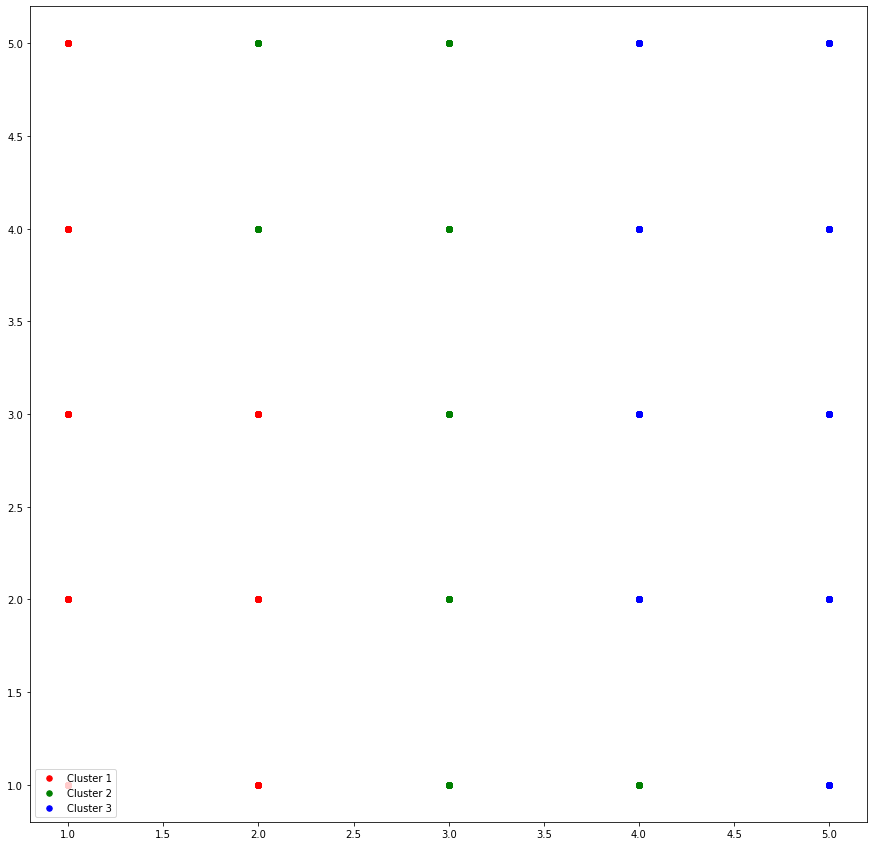

In [467]:
cluster1 = X[0:200,:]
cluster2 = X[200:400,:]
cluster3 = X[400:624,:]

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

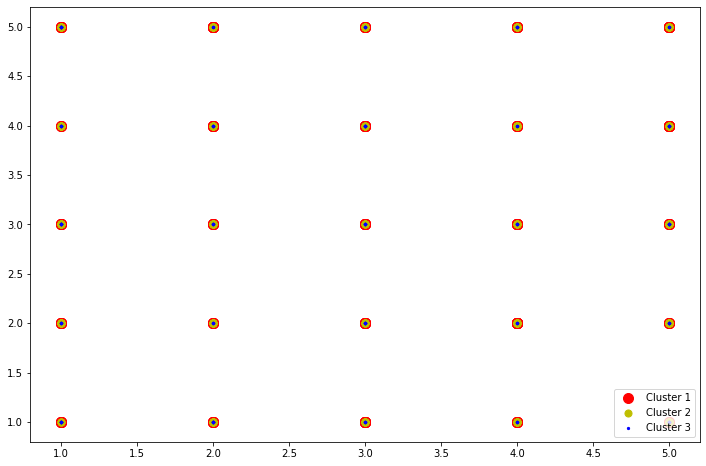

In [468]:
np.random.shuffle(X)
cluster1 = X[0:200,:]
cluster2 = X[200:400,:]
cluster3 = X[400:624,:]


fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,3], s=100, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=50, color='y', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=5, color='b', label='Cluster 3')
ax.legend()


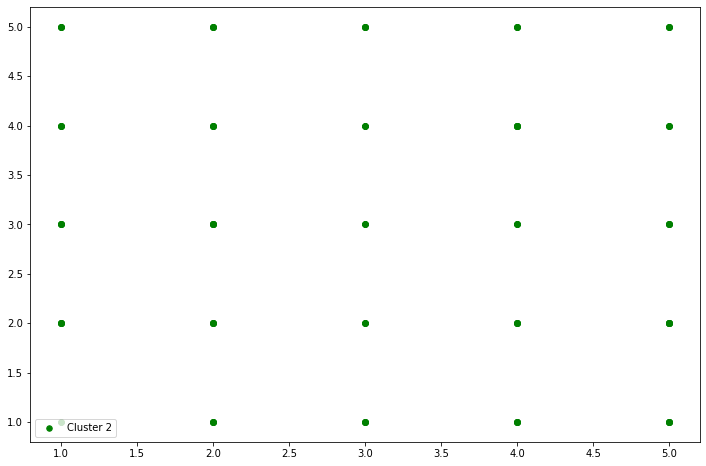

In [469]:
# the above plot shows that points are on each other
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.legend()

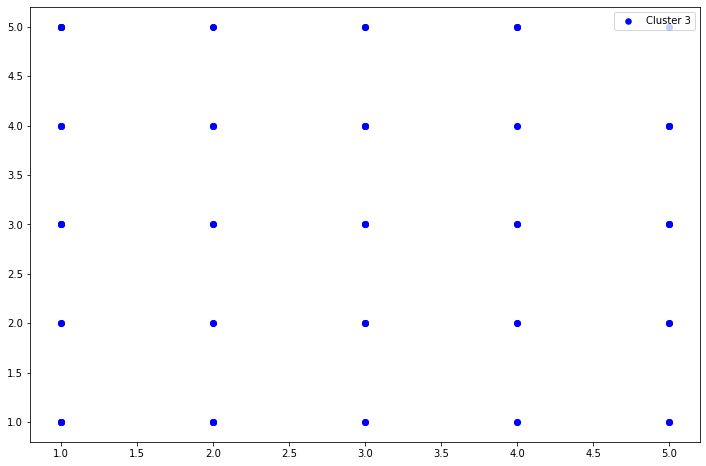

In [470]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

In [471]:

idx = find_closest_centroids(X, initial_centroids)
print(idx[:3])

[1. 2. 0.]


In [472]:
# Update Centroids
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))  #3*4
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0]))
    return centroids        

In [473]:
compute_centroids(X, idx, 3)

array([[2.85990338, 2.44444444, 4.48792271, 2.85990338],
       [2.44486692, 3.36882129, 2.29657795, 2.44486692],
       [4.14935065, 3.12987013, 2.21428571, 4.14935065]])

In [474]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        # find closest centroid
        idx = find_closest_centroids(X, centroids)
        #update centroids
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids
 

In [475]:
idx, centroids = run_k_means(X, initial_centroids, 1000)


In [ ]:
# print(idx)
# print(centroids)

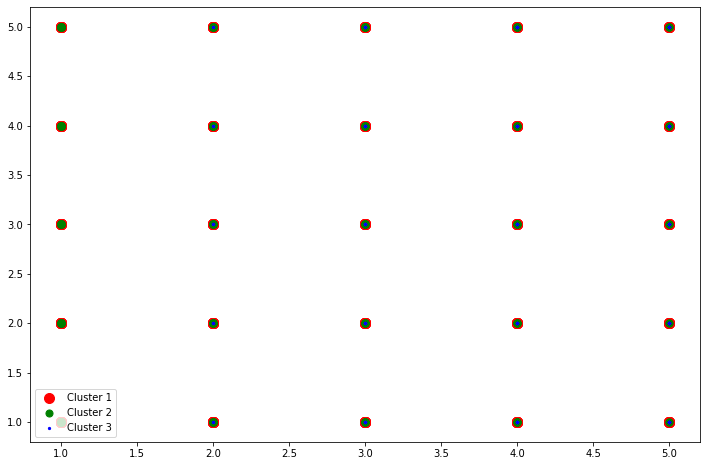

In [477]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=100, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=50, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=5, color='b', label='Cluster 3')
ax.legend()

In [510]:
def euclidean(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist


def DaviesBouldin(X, labels):
    n_cluster = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]

    # calculate cluster dispersion
    S = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    Ri = []

    for i in range(n_cluster):
        Rij = []
        # establish similarity between each cluster and all other clusters
        for j in range(n_cluster):
            if j != i:
                r = (S[i] + S[j]) / euclidean(centroids[i], centroids[j])
                Rij.append(r)
         # select Ri value of most similar cluster
        Ri.append(max(Rij)) 

    # get mean of all Ri values    
    dbi = np.mean(Ri)

    return dbi

In [ ]:
labels = [1,2,3]
index_db_val = DaviesBouldin(alldata,labels)
print("Davies Bouldin index: " + str(index_db_val))